# Introduction: What Makes a Ghost?
#### Amy Mullen
In order to find the best neighboorhood for ghost hunting, one significant metric is the amount/types of deaths in a given neighborhood. Natural deaths aren't common in spooky stories since there wouldn't be a reason for ghosts to stay and haunt.
So I decided to focus on the more 'unnatural' deaths listed in the data: Homicide, Suicide, and Unintentional injuries.
My goal was to find which neighborhood has the most non-natural deaths as this would increase the likelyhood of finding a ghost lurking there.

In [3]:
import fpsnippets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("mortality_by_tract.csv")

cols = ['Homicide', 'Suicide', 'Unintentional injuries']

df['Ghosts'] = df[cols].sum(axis=1)

filtered_df = df.loc[df['Ghosts'] > 0]


First I added another column to the mortality data which adds up all of the Homicide, Suicide, and Unintentional injuries for each tract.
If the column previously mentioned had no data in it (No Homicide, Suicide, and Unintentional injuries for the tract) then I removed the row so I was left with the tracts that could have ghosts.

In [4]:
def neighbor(row): 
    neigh =  fpsnippets.census_to_neighborhoods(row)
    return neigh

#print (neighbor(42003010300))
my_list=[]

for ind in filtered_df.index:
    x = int(filtered_df['Census_Tract'][ind])
    my_list.append(neighbor(x))

res = list(filter(None, my_list))

def flat(lis):
    flatList = []
    for element in lis:
        if type(element) is list:
            for item in element:
                flatList.append(item)
        else:
            flatList.append(element)
    return flatList

places= flat(res)

d = {x:places.count(x) for x in places}

sortlow = dict(sorted(d.items(), key=lambda x:x[1]))

#print(sortlow)

I then took the filtered data and compared eact tract number to the neighborhoods it applied to using the code given by the UTA. I added the subsequent lists of neighborhoods into one large list and used a dictionary to count the amount of times a neighborhood would show up in the data. I then sorted it by least to most calls.

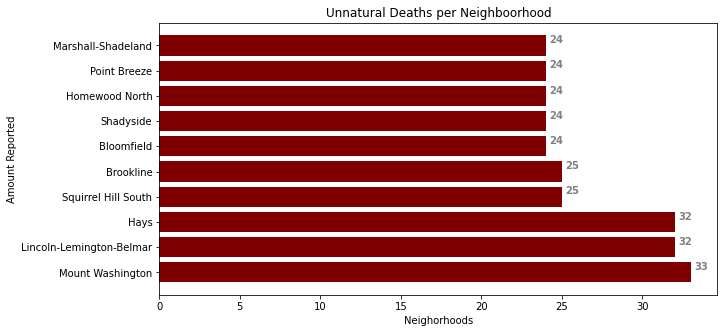

In [5]:
finals = dict(sorted(sortlow.items(), key = lambda x: x[1], reverse = True)[:10])

place = list(finals.keys())
values = list(finals.values())

fig, ax = plt.subplots(figsize =(10, 5))
 
ax.barh(place, values, color ='maroon')

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

plt.xlabel("Neighorhoods")
plt.ylabel("Amount Reported")
plt.title("Unnatural Deaths per Neighboorhood")
plt.show()

From this dictionary I was able to make a graph to visualize the top 10 neighborhoods in terms of unnatural deaths.
* Mount Washington-33
* Lincoln-Lemmington-Belmar and Hays-32
* Squirrel Hill South and Brookline-25
* Bloomfield, Shadyside, Homewood North, Point Breeze, Marshall-Shadyside-24

# Conclusion
I was a bit suprised to see such high unnatrual death counts for places like Shadyside and Squirrel Hill as these are places that are frequently considered 'safe'. This data doesn't nessecarily show that to be false as most of the deaths within this data are from unintentional injuries, but as someone who likes to hang out in Shadyside, I don't hear about deaths there often, if at all.